## logic:
- take a video
- crop the video in images in 10 second gaps
- input images in the transformer and store the captions in a list.
- use a text to audio model.

In [1]:
# !pip install sounddevice
# !pip install PortAudio

In [2]:
import numpy as np
# import sounddevice as sd
import glob
import skimage
from skimage import io
import matplotlib.pyplot as plt

## input image

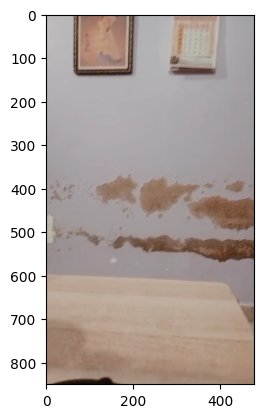

In [3]:

path='/kaggle/input/blind-guidance/1.png'
image=io.imread(path)
i,(im1)=plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

## using transformer model to convert image to text and text to speech

In [4]:
from transformers import pipeline

synthesizer = pipeline("text-to-speech", "suno/bark")

from transformers import pipeline

captioner = pipeline("image-to-text", model="Salesforce/blip-image-captioning-base")


2025-07-06 00:29:12.502686: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751761752.691583      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751761752.748344      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/4.49G [00:00<?, ?B/s]

generation_config.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/353 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cuda:0


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


In [5]:

a= captioner("https://images.ctfassets.net/hrltx12pl8hq/28ECAQiPJZ78hxatLTa7Ts/2f695d869736ae3b0de3e56ceaca3958/free-nature-images.jpg?fit=fill&w=1200&h=630")
i=1
test_image=captioner(f'/kaggle/input/blind-guidance/{i}.png')
test_image
result=[]
for i in range(1,10):
    result.append(captioner(f'/kaggle/input/blind-guidance/{i}.png'))
result

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


[[{'generated_text': 'a man is sitting on a couch in a room'}],
 [{'generated_text': 'a man is standing in front of a wall with a hole'}],
 [{'generated_text': 'a man is sitting on a chair in front of a wall with mold'}],
 [{'generated_text': 'a cat is sitting on a table in a room'}],
 [{'generated_text': 'a man is standing in front of a wall with a large hole'}],
 [{'generated_text': 'a man is standing in front of a wall with a hole'}],
 [{'generated_text': 'a man is standing in front of a wall with mold'}],
 [{'generated_text': 'a man is standing in front of a wall with mold'}],
 [{'generated_text': 'a man is standing in front of a wall with mold'}]]

## text to audio

In [ ]:
a
b=a[0]['generated_text']
type(b)
direction=synthesizer(b)

In [21]:
direction

{'audio': array([[-0.00195895, -0.0016925 , -0.00043646, ...,  0.00010233,
          0.00015311,  0.0002149 ]], dtype=float32),
 'sampling_rate': 24000}

In [22]:


# print(type(wave_audio),type(dir_value))
dir_value=direction['audio']
from IPython.display import Audio
# wave_audio = np.sin(np.linspace(0, 3000, 20000))
# Audio(dir_value, rate=40000)
# Audio(dir_value,rate=20000)

Audio(dir_value,rate=24000)

In [14]:
wave_audio

array([0.        , 0.14944555, 0.29553454, ..., 0.497747  , 0.36253982,
       0.21918997])

In [12]:
dir_value

array([[-0.0062451 , -0.0058617 , -0.0054883 , ...,  0.00058554,
         0.00061128,  0.00079416]], dtype=float32)

In [23]:
with open('/kaggle/working/direction.wav','wb') as f:
    f.write(wave_audio.data)

## testing model efficiency on house hold objects

In [29]:

bottle='/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.37 AM.jpeg'

captioner(bottle)

[{'generated_text': 'a red and white bottle sitting on a table'}]

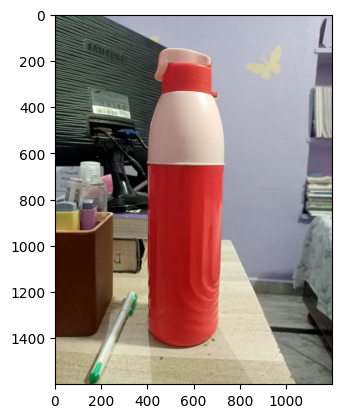

In [32]:
image=io.imread(bottle)
i,(im1)=plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)

In [31]:

bottle_disc=captioner(bottle)
b=bottle_disc[0]['generated_text']
direction=synthesizer(b)
dir_value=direction['audio']
from IPython.display import Audio
Audio(dir_value,rate=24000)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [ ]:
### write a custom function to test on input images

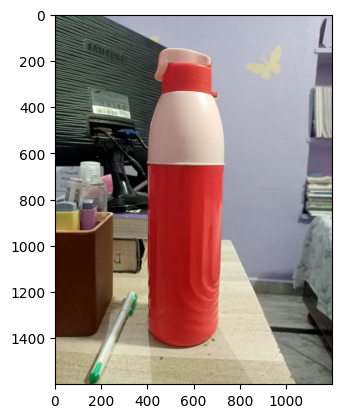

In [33]:
def show_test(item):
    
    captioner(item)
    image=io.imread(item)
    i,(im1)=plt.subplots(1)
    i.set_figwidth(15)
    im1.imshow(image)

    

In [ ]:
item.append('/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.37 AM.jpeg')

item.append('/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.43 AM.jpeg')

item.append('/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.38 AM.jpeg')

item.append('/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.39 AM.jpeg')

item.append('/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.42 AM (2).jpeg')

In [ ]:
show_test('/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.37 AM.jpeg')

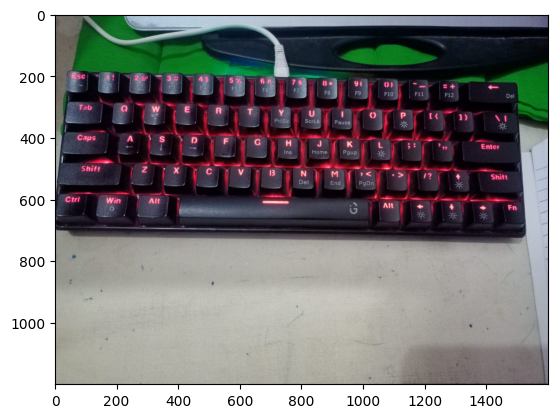

In [59]:
show_test(item[1])

In [58]:

bottle_disc=captioner(item[1])
b=bottle_disc[0]['generated_text']
direction=synthesizer(b)
dir_value=direction['audio']
from IPython.display import Audio
Audio(dir_value,rate=24000)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.


In [47]:
item=[]

In [50]:
item.append('/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.38 AM (1).jpeg')

In [55]:
item

['/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.37 AM.jpeg',
 '/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.38 AM (1).jpeg',
 '/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.38 AM.jpeg',
 '/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.39 AM.jpeg',
 '/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.42 AM (2).jpeg',
 '/kaggle/input/common-household-objects/WhatsApp Image 2025-07-05 at 6.36.43 AM.jpeg']